In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

def myax(ax):
    ax.grid(True,alpha=0.2)
    ax.axhline(0,lw=1,c='k')
    ax.axvline(0,lw=1,c='k')
    ax.legend()


def ForwardFiniteDiff(f,x,dx=1e-6,xopt_true=None):
  return ( f(x+dx) - f(x) ) / (dx)

def CentralFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - f(x-dx)) / (2*dx)

def SecondOrderFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - 2*f(x) + f(x-dx) ) / (dx**2)

def NewtonRaphsonRoot(f,x0,tol=1e-6,xtrue=None,max_iter=50): 
  # initialize: 
  err = np.nan
  data = [] 
  if f(x0) == 0.0:
      return x0
  for i in range(max_iter):
      dfdx = CentralFiniteDiff(f,x0)
      f0 = f(x0)
      x = x0 - (f0 / dfdx)
      err = abs((x - x0)/x) * 100
      x0 = x 
      data.append([x,err])
      if (err < tol) or (f0 == 0.0): 
          break 
  data = pd.DataFrame(data,columns=['x_root','Ea'])
  # calculate true error (Et) if possible:
  if xtrue is not None: 
      data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
  
  print(f'numerical root = {x}')
  print(f'approx. error  = {err}%')
  return x, data

No handles with labels found to put in legend.


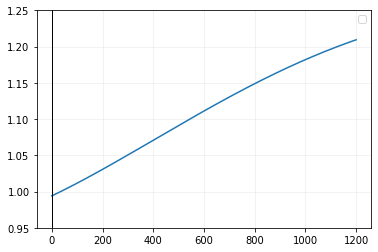

In [ ]:
def cP(T): 
  a0, a1, a2, a3, a4 = (0.99403, 1.671e-4, 9.7215e-8, -9.5838e-11, 1.9520e-14)
  return a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4  

T = np.linspace(0,1200,200)
fig,ax = plt.subplots(1,1)
ax.plot(T,cP(T))
myax(ax)
ax.set_ybound(0.95,1.25)


In [ ]:
# To find a temperature that corresponds to a cP of 1.1 kJ/(kg K), even though cP does not cross x-axis, can still be done. 
#     1.1 = f(x)  --> 0 = f(x) - 1.1
# and solve. 
 

def fcP(x):
  return cP(x) - 1.1



In [ ]:


xr, res = NewtonRaphsonRoot(fcP,0.1)


print(f'\nThe temperature with a Cp - 1.1 kJ/(kg K) = {xr} K')

numerical root = 544.087537655509
approx. error  = 1.669506780673301e-11%

The temperature with a Cp - 1.1 kJ/(kg K) = 544.087537655509 K


No handles with labels found to put in legend.


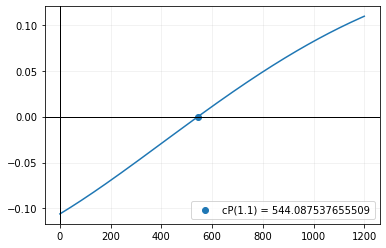

In [ ]:
# plot again
T = np.linspace(0,1200,200)
fig,ax = plt.subplots(1,1)
ax.plot(T,fcP(T))
myax(ax)
ax.set_ybound()
ax.scatter(xr,fcP(xr),label=f'cP(1.1) = {xr}')
ax.legend()